In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('/content/books.csv',error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
top_most=data[data['ratings_count']>1000000]

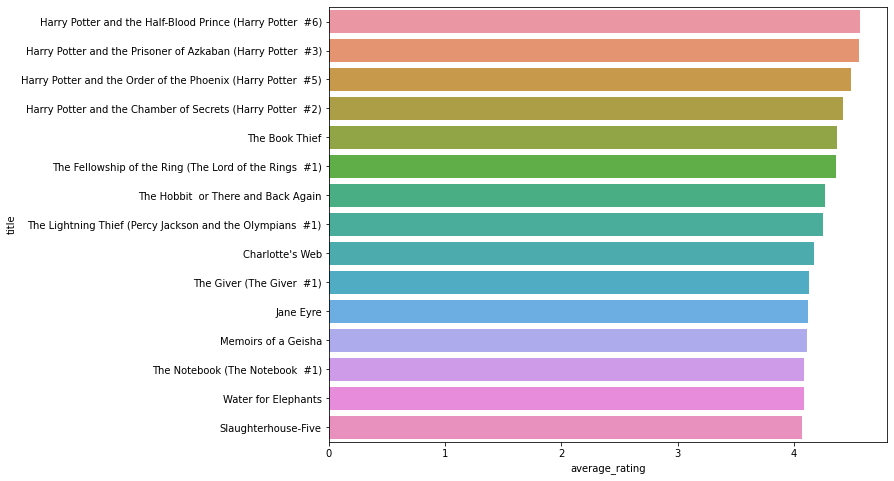

In [5]:
data1=top_most.sort_values(by='average_rating',ascending=False).head(15)
plt.figure(figsize=(10,8))
sns.barplot(x='average_rating',y='title',data=data1)

In [6]:
data.loc[(data['average_rating']>=0) & (data['average_rating']<=1),'rating_between'] = 'between 0 and 1'

In [7]:
data.loc[(data['average_rating']>1) & (data['average_rating']<=2),'rating_between'] = 'between 1 and 2'

In [8]:
data.loc[(data['average_rating']>2) & (data['average_rating']<=3),'rating_between'] = 'between 2 and 3'
data.loc[(data['average_rating']>3) & (data['average_rating']<=4),'rating_between'] = 'between 3 and 4'
data.loc[(data['average_rating']>4) & (data['average_rating']<=5),'rating_between'] = 'between 4 and 5'

In [9]:
rating_df=pd.get_dummies(data['rating_between'])
language_df=pd.get_dummies(data['language_code'])

In [10]:
features=pd.concat([rating_df,language_df,data['average_rating'],data['ratings_count']],axis=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [12]:
model=neighbors.NearestNeighbors(n_neighbors=7)
model.fit(features)
dist, idlist = model.kneighbors(features)

In [13]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = data[data['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(data.loc[newid].title)
    return book_list_name
    
BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)',
 'The Hobbit  or There and Back Again']

In [14]:
BookRecommender('Slaughterhouse-Five')

['Slaughterhouse-Five',
 "My Sister's Keeper",
 'The Secret Life of Bees',
 'The Notebook (The Notebook  #1)',
 'The Shining',
 'Gone with the Wind',
 'The Picture of Dorian Gray']

#Good job